# Descripci√≥n del proyecto

<div class="alert alert-block" style="background-color: #D8BFD8; color: #374151;">
Trabajas en una empresa emergente que vende productos alimenticios. 

Debes investigar el comportamiento del usuario para la aplicaci√≥n de la empresa.

Primero, estudia el embudo de ventas. Descubre c√≥mo los usuarios llegan a la etapa de compra. ¬øCu√°ntos usuarios realmente llegan a esta etapa? ¬øCu√°ntos se atascan en etapas anteriores? ¬øQu√© etapas en particular?

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener m√°s informaci√≥n sobre los test A/A/B). 
Al equipo de dise√±o le gustar√≠a cambiar las fuentes de toda la aplicaci√≥n, pero la gerencia teme que los usuarios piensen que el nuevo dise√±o es intimidante. Por ello, deciden tomar una decisi√≥n basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qu√© conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparaci√≥n de grupos de control tambi√©n nos dice cu√°nto tiempo y datos necesitaremos cuando realicemos m√°s tests.

Utilizar√°s el mismo dataset para el an√°lisis general y para el an√°lisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de an√°lisis estudia la calidad de una aplicaci√≥n utilizando datos generales, sin prestar atenci√≥n a si los usuarios participan en experimentos.


### Paso 1. Abrir el archivo de datos y leer la informaci√≥n general


In [767]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.dates as mdates

In [768]:
data = pd.read_csv('logs_exp_us.csv', sep="\t")

In [769]:
#Se define EDA funci√≥n para explorar los datos.

def EDA(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Filas Duplicadas")
    print(datos.duplicated().sum())

In [770]:
EDA(data)

Primeras Filas
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Revision de Datos Ausentes
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0

### Paso 2. Preparar los datos para el an√°lisis
Cambia el nombre de las columnas de manera que sea conveniente para ti.
Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
Agrega una columna de fecha y hora y una columna separada para las fechas.

In [772]:
data.head()

EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

In [773]:
data.columns = ['event', 'user','timestamp','exp_id']

In [774]:
data.head()

event                 user   timestamp  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248

In [775]:
data['datetime'] = pd.to_datetime(data['timestamp'], unit = 's')

In [776]:
data['date'] = data['datetime'].dt.floor('1D')

In [777]:
data.head()

event                 user   timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257  1564029816     246   
1         MainScreenAppear  7416695313311560658  1564053102     246   
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248   
3         CartScreenAppear  3518123091307005509  1564054127     248   
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248   

             datetime       date  
0 2019-07-25 04:43:36 2019-07-25  
1 2019-07-25 11:11:42 2019-07-25  
2 2019-07-25 11:28:47 2019-07-25  
3 2019-07-25 11:28:47 2019-07-25  
4 2019-07-25 11:48:42 2019-07-25

### Paso 3. Estudiar y comprobar los datos	
¬øCu√°ntos eventos hay en los registros?

In [779]:
# Conteo de cada tipo de evento
eventos_unicos = data_clean['event'].nunique()
print(f"Tipos de Eventos: {eventos_unicos}")

Tipos de Eventos: 5


In [780]:
# Tipos de Eventos
list(data['event'].unique())

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear',
 'Tutorial']

¬øCu√°ntos usuarios hay en los registros?


In [782]:
usuarios = data['user'].nunique()
print(f"Total de Usuarios: {usuarios}")

Total de Usuarios: 7551


¬øCu√°l es el promedio de eventos por usuario?

In [784]:
len(data)/data['user'].nunique()

32.33028737915508

<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
En promedio, se observan 32 usuarios por evento, aunque esta cifra puede variar hacia arriba o hacia abajo dependiendo de las circunstancias espec√≠ficas de cada evento.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>√âxito</b> - ¬°Excelente inicio en la preparaci√≥n de los datos! Tu enfoque para explorar y organizar la informaci√≥n es s√≥lido y demuestra un buen manejo de las herramientas y conceptos b√°sicos de an√°lisis de datos.

‚úÖ **Puntos positivos:**
1. **Funci√≥n EDA clara y reutilizable:** La funci√≥n definida para explorar los datos iniciales es muy √∫til. Permite inspeccionar aspectos clave como valores nulos, duplicados y una visi√≥n general del dataset.
2. **Renombrar columnas:** Cambiar los nombres de las columnas para que sean m√°s convenientes y claros es una pr√°ctica excelente para mantener consistencia y claridad en el an√°lisis.
3. **Conversi√≥n de tipos de datos:** Convertir `timestamp` a un formato datetime y agregar columnas como `datetime` y `date` demuestra una correcta preparaci√≥n para an√°lisis posteriores.
4. **Exploraci√≥n inicial del dataset:** El c√°lculo de usuarios √∫nicos, eventos √∫nicos y el promedio de eventos por usuario establece una buena base para evaluar el comportamiento de los datos.

---

‚ö†Ô∏è **Sugerencias de mejora:**
1. **Documentaci√≥n en los pasos:** Agrega comentarios o notas explicativas dentro del c√≥digo para que sea m√°s f√°cil de seguir. Por ejemplo, explica brevemente por qu√© agregas la columna `date` separada de `datetime`.
2. **Validaci√≥n de datos:** Aunque verificaste valores ausentes y duplicados, ser√≠a √∫til incluir una tabla resumen o gr√°fico r√°pido para visualizar las proporciones de datos faltantes (por ejemplo, con un heatmap de `sns.heatmap(data.isna(), cmap="viridis")`).
3. **Verificaci√≥n de valores √∫nicos:** Cuando exploras los eventos √∫nicos (`data['event'].unique()`), podr√≠as tambi√©n contar la frecuencia de cada uno para priorizar los eventos m√°s relevantes.
4. **Formato de salida:** Considera imprimir los resultados de una manera m√°s organizada. Por ejemplo, los nombres de los eventos pueden imprimirse en un listado limpio para facilitar la interpretaci√≥n.

---

En general, esta secci√≥n est√° bien implementada y proporciona una base s√≥lida para el an√°lisis posterior. 
</div>

¬øQu√© periodo de tiempo cubren los datos? Encuentra la fecha m√°xima y m√≠nima. Traza un histograma por fecha y hora.

In [787]:
# Obtener la fecha m√≠nima y m√°xima en los datos
fecha_min = data['datetime'].min()
fecha_max = data['datetime'].max()

print(f"Los datos cubren desde {fecha_min} hasta {fecha_max}")

Los datos cubren desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


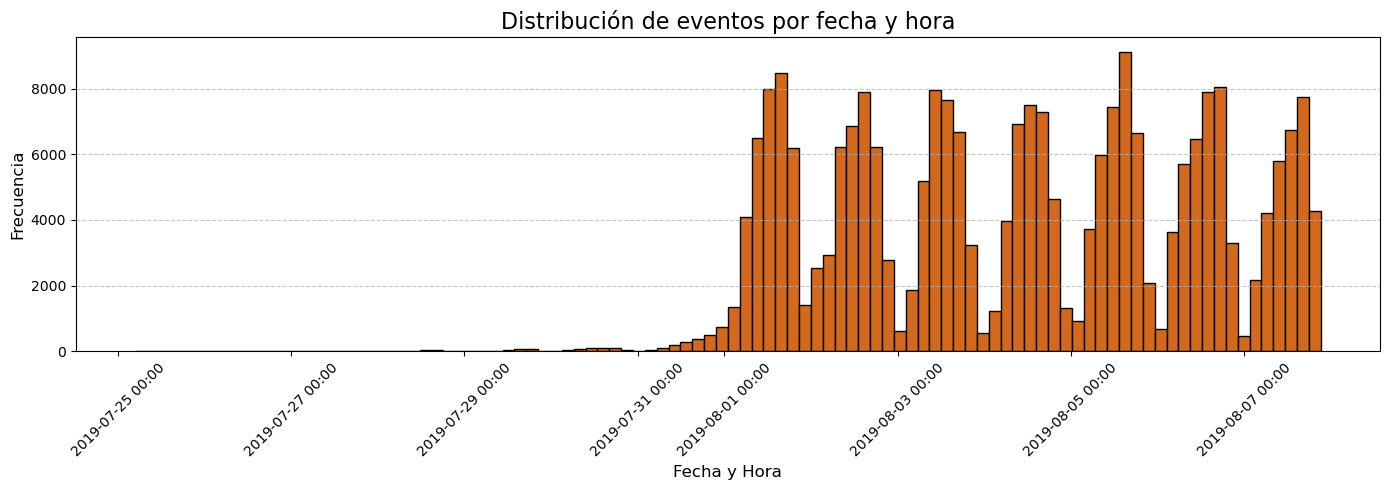

In [788]:
plt.figure(figsize=(14, 5))
plt.hist(data['datetime'], bins=100, color='chocolate', edgecolor='black')

# Formato del eje X para mostrar fecha y hora
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Autoajuste de intervalos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Fecha y hora

plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.title('Distribuci√≥n de eventos por fecha y hora', fontsize=16)
plt.xlabel('Fecha y Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadr√≠cula sutil en el eje Y

plt.tight_layout()
plt.show()

In [789]:
#Revisemos cuantos usuarios hay por fecha
usuarios_por_fecha = data.groupby(data['datetime'].dt.date)['user'].nunique()
usuarios_por_fecha

datetime
2019-07-25       7
2019-07-26      22
2019-07-27      39
2019-07-28      69
2019-07-29     135
2019-07-30     296
2019-07-31     924
2019-08-01    3703
2019-08-02    3647
2019-08-03    3482
2019-08-04    3527
2019-08-05    3802
2019-08-06    3922
2019-08-07    3651
Name: user, dtype: int64

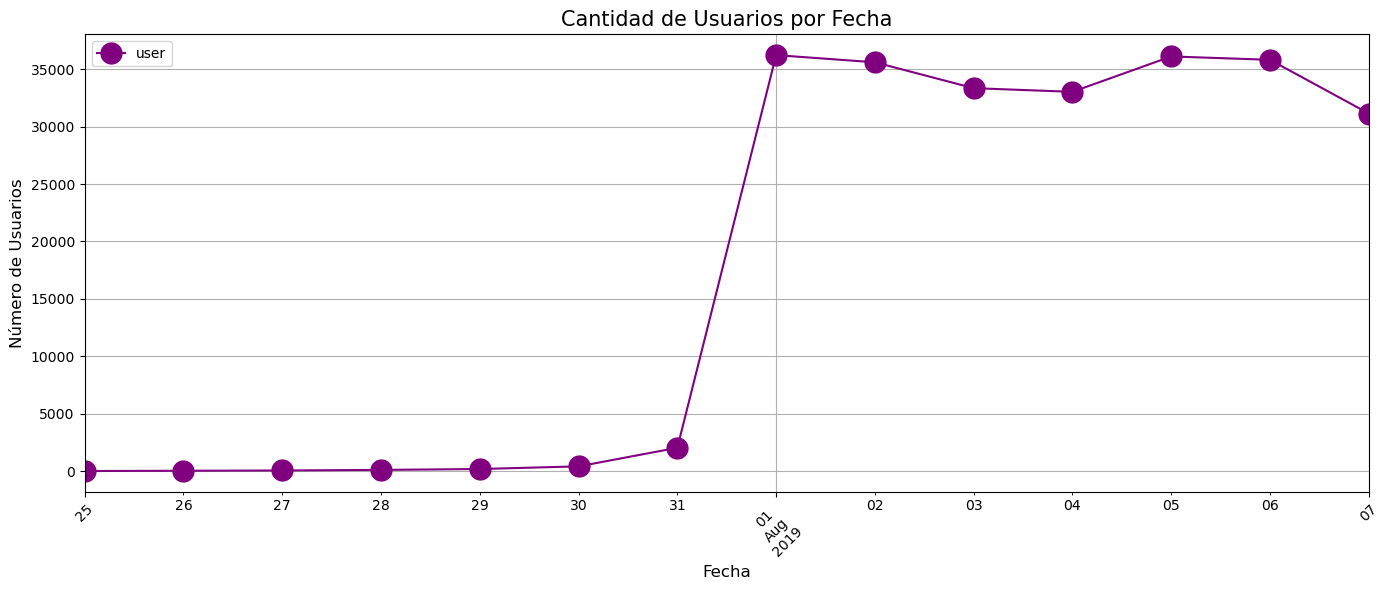

In [790]:
#tabla din√°mica con el conteo de usuarios por fecha
pivot = data.pivot_table(index='date', values='user', aggfunc='count')
pivot.plot(style='o-', grid=True, figsize=(14, 6), color='purple', markersize=15)
plt.title('Cantidad de Usuarios por Fecha', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('N√∫mero de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¬øPuedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos m√°s antiguos podr√≠an terminar en los registros de algunos usuarios por razones t√©cnicas y esto podr√≠a sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la secci√≥n anterior. ¬øQu√© periodo representan realmente los datos?

<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
Se observa un incremento en los datos a partir del 1 de agosto, por lo que se utilizar√° la informaci√≥n a partir de esa fecha para continuar con el an√°lisis

In [793]:
data_clean = data.query('datetime >= "2019-08-01"').reset_index()

In [794]:
usuarios_por_fecha2 = data_clean.groupby(data_clean['datetime'].dt.date)['user'].nunique()
usuarios_por_fecha2

datetime
2019-08-01    3703
2019-08-02    3647
2019-08-03    3482
2019-08-04    3527
2019-08-05    3802
2019-08-06    3922
2019-08-07    3651
Name: user, dtype: int64

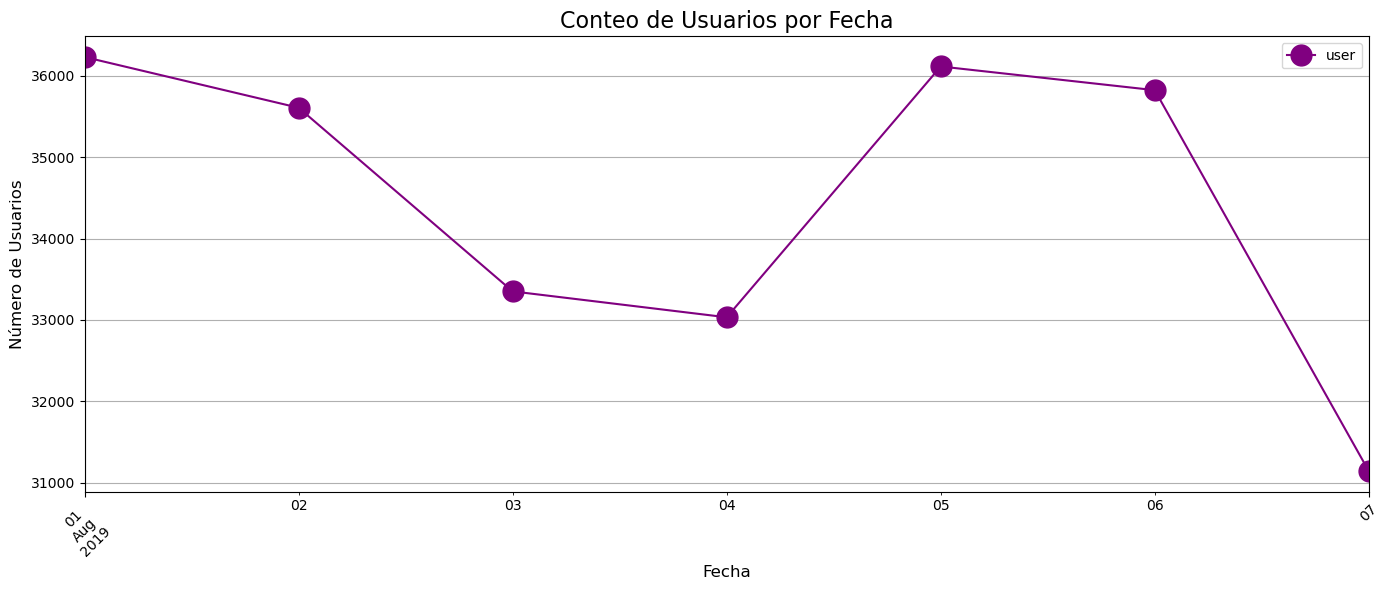

In [795]:
# tabla din√°mica con el conteo de usuarios por fecha
pivot = data_clean.pivot_table(index='date', values='user', aggfunc='count')
pivot.plot(style='o-', grid=True, figsize=(14, 6), color='purple', markersize=15)
plt.title('Conteo de Usuarios por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('N√∫mero de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

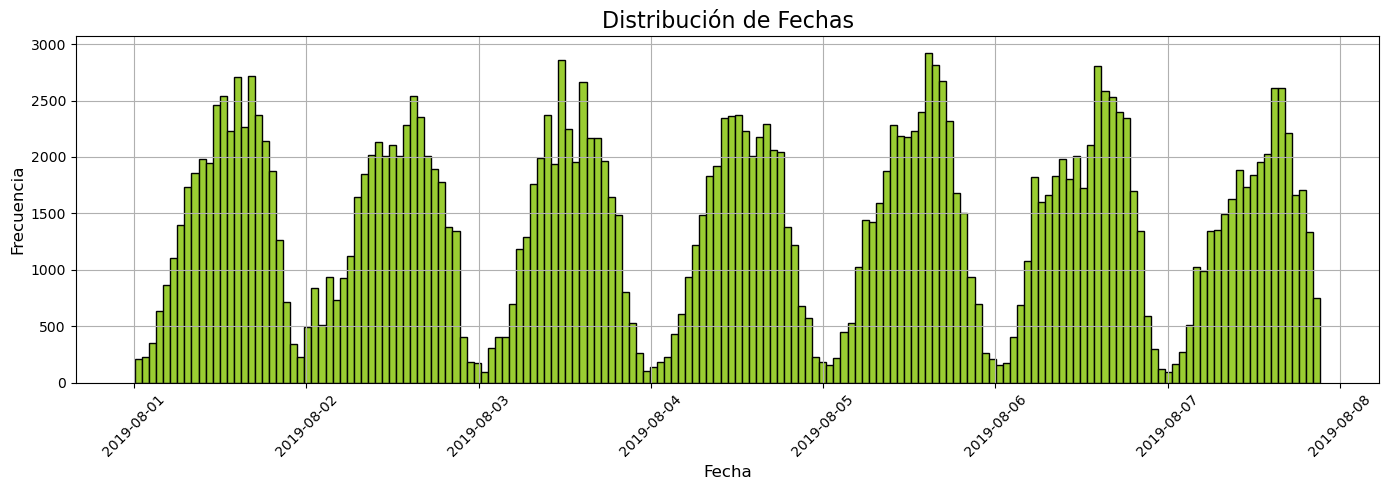

In [796]:
# Crear el histograma de la columna 'datetime'
data_clean['datetime'].hist(bins=7*24, figsize=(14, 5), color='yellowgreen', edgecolor='black')

plt.title('Distribuci√≥n de Fechas', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>√âxito</b> - ¬°Buen trabajo al analizar y visualizar el rango de tiempo de los datos! Has presentado informaci√≥n clave de manera clara, incluyendo la distribuci√≥n de eventos a lo largo del tiempo y el ajuste de la fecha inicial para obtener datos m√°s consistentes.

‚úÖ **Puntos positivos:**
1. **Identificaci√≥n del periodo √∫til de datos:** Detectaste correctamente que los datos comienzan a estar completos a partir del 1 de agosto y ajustaste tu an√°lisis en consecuencia.
2. **Visualizaci√≥n clara:** El histograma presentado ofrece una representaci√≥n gr√°fica bien estructurada de la distribuci√≥n de eventos, permitiendo observar patrones recurrentes.
3. **Formatos personalizables:** Usaste un formato de eje X con fechas legibles y rotaste las etiquetas para mejorar la interpretaci√≥n.

---

‚ö†Ô∏è **Sugerencias de mejora:**
1. **Legibilidad del histograma:**
   - Aunque el histograma es claro, la cantidad de intervalos (bins) podr√≠a ajustarse din√°micamente en funci√≥n de la cantidad de datos. Esto permitir√≠a una mejor comprensi√≥n de las concentraciones de eventos.
   - Considera agregar un promedio o l√≠nea de referencia para identificar si hay d√≠as con una frecuencia significativamente mayor o menor.
   
2. **Colores consistentes:** Cambiaste el color del histograma de `chocolate` a `yellowgreen` en diferentes gr√°ficos. Para mejorar la cohesi√≥n visual, utiliza una paleta uniforme en todo el proyecto.
   

</div>

¬øPerdiste muchos eventos y usuarios al excluir los datos m√°s antiguos?
Aseg√∫rate de tener usuarios de los tres grupos experimentales.

In [798]:
#Cual es el total de eventos por usuario que hay en toda la data
print(len(data))

244126


In [799]:
#Vamos a revisar cu√°ntos datos han sido perdidos
total_events_clean = len(data_clean)
total_events_clean

241298

In [800]:
user_clean = len(data_clean['user'].unique())
user_clean

7534

In [801]:
eventos_per_user = total_events_clean/user_clean
print(eventos_per_user)

32.02787363950093


In [802]:
#Procederemos a verificar el porcentaje de datos perdidos
total_events_original = len(data)
data_loss_percentage = (total_events_original - total_events_clean) / total_events_original * 100

# Mostrar el porcentaje de p√©rdida
print(f'Porcentaje de datos perdidos: {data_loss_percentage:.2f}%')

Porcentaje de datos perdidos: 1.16%


<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
Se observa que el total de usuarios perdidos es de 7,534 en comparaci√≥n con la data original, lo que representa un porcentaje de p√©rdida de datos del 1.16%. Sin embargo, esta p√©rdida no afecta de manera significativa al an√°lisis.

### Paso 4. Estudiar el embudo de eventos

Observa qu√© eventos hay en los registros y su frecuencia de suceso. Ord√©nalos por frecuencia.

Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el n√∫mero de usuarios. Calcula la proporci√≥n de usuarios que realizaron la acci√≥n al menos una vez.

¬øEn qu√© orden crees que ocurrieron las acciones? ¬øTodas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

Utiliza el embudo de eventos para encontrar la proporci√≥n de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A ‚Üí B ‚Üí C, calcula la proporci√≥n de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporci√≥n de usuarios en la etapa C a la cantidad en la etapa B.

¬øEn qu√© etapa pierdes m√°s usuarios?

¬øQu√© porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [806]:
#Observa qu√© eventos hay en los registros y su frecuencia de suceso por usuario. Ord√©nalos por frecuencia
event_frequency = data.pivot_table(index='event', values='user', aggfunc='count').sort_values('user', ascending=False)

In [807]:
event_frequency

user
event                          
MainScreenAppear         119205
OffersScreenAppear        46825
CartScreenAppear          42731
PaymentScreenSuccessful   34313
Tutorial                   1052

In [808]:
#Cuantos "usuarios √∫nicos" fueron expuestos a cada experimento o lanzaron ese evento
user_per_event = data_clean.pivot_table(index='event', values='user', aggfunc='nunique').sort_values('user', ascending=False)

In [809]:
user_per_event

user
event                        
MainScreenAppear         7419
OffersScreenAppear       4593
CartScreenAppear         3734
PaymentScreenSuccessful  3539
Tutorial                  840

<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
Podemos observar como ejemplo en MainScreenAppear que 7,419 usuarios unicos generaron un total de 119,205 vistas, lo que indica que algunos usuarios visitaron m√°s de una vez la p√°gina principal. 

In [811]:
#Calcula la proporci√≥n de usuarios que realizaron la acci√≥n al menos una vez.
user_per_event / data_clean['user'].nunique()

user
event                            
MainScreenAppear         0.984736
OffersScreenAppear       0.609636
CartScreenAppear         0.495620
PaymentScreenSuccessful  0.469737
Tutorial                 0.111495

<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
Se ha representado el porcentaje de usuarios que realizaron la acci√≥n en cada evento. En este an√°lisis, el evento 'Tutorial' presenta un porcentaje relativamente bajo de usuarios que participaron en √©l 

El flujo com√∫n de eventos podr√≠a ser:

MainScreenAppear: El usuario abre la aplicaci√≥n.

OffersScreenAppear: El usuario ve las ofertas.

CartScreenAppear: El usuario agrega productos al carrito.

PaymentScreenSuccessful: El usuario realiza el pago.

Tutorial: El usuario recibe un tutorial (esto podr√≠a ocurrir en cualquier momento).

In [814]:
#Se realizar√° el an√°lisis sin Tutorial, ya que el acceso puede ocurrir en cualquier momento. 
users_funnel = user_per_event [:-1]
users_funnel

user
event                        
MainScreenAppear         7419
OffersScreenAppear       4593
CartScreenAppear         3734
PaymentScreenSuccessful  3539

In [815]:
#¬øEn qu√© orden crees que ocurrieron las acciones? ¬øTodas son parte de una sola secuencia?
#en otras palabras queremos saber cuantos pasaron de una secci√≥n a otra, o de un evento a otro

In [816]:
users_funnel = (users_funnel/users_funnel.shift()) 
users_funnel

user
event                            
MainScreenAppear              NaN
OffersScreenAppear       0.619086
CartScreenAppear         0.812976
PaymentScreenSuccessful  0.947777

In [817]:
users_funnel.fillna(1,inplace=True)

In [818]:
users_funnel

user
event                            
MainScreenAppear         1.000000
OffersScreenAppear       0.619086
CartScreenAppear         0.812976
PaymentScreenSuccessful  0.947777

In [819]:
(user_per_event.loc['PaymentScreenSuccessful', 'user'] / user_per_event.loc['MainScreenAppear', 'user'])*100

47.70184661005526

<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
El 94% de los usuarios llegan hasta la p√°gina de pago; sin embargo, solo el 47% completa la compra. Consulta la siguiente l√≠nea de c√≥digo para m√°s detalles.

In [821]:
# Calcular la proporci√≥n de usuarios entre eventos consecutivos y las ca√≠das de usuarios
user_loss = {}

for i in range(len(event_sequence) - 1):
    current_event = event_sequence[i]
    next_event = event_sequence[i + 1]
    
    # Obtener los usuarios √∫nicos en cada evento
    users_current = set(data_clean[data_clean['event'] == current_event]['user'].unique())
    users_next = set(data_clean[data_clean['event'] == next_event]['user'].unique())
    
    # Calcular la proporci√≥n de usuarios que pasan de un evento a otro
    proportion = len(users_next.intersection(users_current)) / len(users_current) if len(users_current) > 0 else 0
    user_loss[f"{current_event} ‚Üí {next_event}"] = 1 - proportion  # P√©rdida de usuarios
    
# Mostrar las p√©rdidas
loss_df = pd.DataFrame(list(user_loss.items()), columns=['Evento de Origen ‚Üí Evento de Destino', 'P√©rdida de Usuarios'])
loss_df = loss_df.sort_values(by='P√©rdida de Usuarios', ascending=False)

# Mostrar la etapa donde hay m√°s p√©rdida de usuarios
print(loss_df)

         Evento de Origen ‚Üí Evento de Destino  P√©rdida de Usuarios
3          PaymentScreenSuccessful ‚Üí Tutorial             0.868042
0       MainScreenAppear ‚Üí OffersScreenAppear             0.395875
1       OffersScreenAppear ‚Üí CartScreenAppear             0.198998
2  CartScreenAppear ‚Üí PaymentScreenSuccessful             0.053562


<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
El tutorial no es obligatorio para completar la compra, la etapa m√°s cr√≠tica a mejorar ser√≠a "MainScreenAppear ‚Üí OffersScreenAppear", donde se pierde el 39.6% de los usuarios antes de que lleguen a explorar las ofertas.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atenci√≥n</b> ‚ö†Ô∏è - La metodolog√≠a aplicada para analizar el embudo de eventos es adecuada y se han realizado c√°lculos clave como la proporci√≥n de usuarios entre eventos consecutivos y la identificaci√≥n de p√©rdidas de usuarios en cada etapa. Sin embargo, hay algunos aspectos a mejorar:

1Ô∏è‚É£ **Evitar la impresi√≥n innecesaria de objetos grandes**: `print(loss_df)` puede generar una salida extensa si hay muchos eventos. En su lugar, considera mostrar solo las primeras filas con `loss_df.head()` o visualizar la informaci√≥n con un gr√°fico de barras para facilitar la interpretaci√≥n.  

2Ô∏è‚É£ **Claridad en la presentaci√≥n del flujo de eventos**: Se ha propuesto un orden de eventos l√≥gico, pero ser√≠a √∫til representar este flujo con un diagrama o gr√°fico de embudo (`seaborn.barplot` o `matplotlib`). Esto har√≠a m√°s evidente la transici√≥n entre etapas y las tasas de abandono.  


Con estas mejoras, el an√°lisis del embudo de eventos ser√° m√°s claro y accionable.  

</div>


### Paso 5. Estudiar los resultados del experimento

¬øCu√°ntos usuarios hay en cada grupo?

Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y c√°lculos. Observa si hay una diferencia estad√≠sticamente significativa entre las muestras 246 y 247.

Selecciona el evento m√°s popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acci√≥n. Encuentra su proporci√≥n. Comprueba si la diferencia entre los grupos es estad√≠sticamente significativa. Repite el procedimiento para todos los dem√°s eventos (ahorrar√°s tiempo si creas una funci√≥n especial para esta prueba). ¬øPuedes confirmar que los grupos se dividieron correctamente?

Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¬øQu√© conclusiones puedes sacar del experimento?

¬øQu√© nivel de significancia has establecido para probar las hip√≥tesis estad√≠sticas mencionadas anteriormente? Calcula cu√°ntas pruebas de hip√≥tesis estad√≠sticas has realizado. Con un nivel de significancia estad√≠stica de 0.1, uno de cada 10 resultados podr√≠a ser falso. ¬øCu√°l deber√≠a ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.



In [825]:
#Contar usuarios en cada grupo
usuarios_por_grupo = data_clean.pivot_table(index='exp_id', values = 'user', aggfunc='nunique')

In [826]:
usuarios_por_grupo

user
exp_id      
246     2484
247     2513
248     2537

In [827]:
#Diferencia estad√≠sticamente significativa entre los grupos 246 y 247

# Filtrar los datos para los grupos 246 y 247
grupo_246 = data_clean[data_clean['exp_id'] == 246]['user'].unique()
grupo_247 = data_clean[data_clean['exp_id'] == 247]['user'].unique()

# Realizar la prueba t de Student
t_stat, p_value = ttest_ind(grupo_246, grupo_247, equal_var=False)
print(f"Estad√≠stico t: {t_stat}, Valor p: {p_value}")

Estad√≠stico t: 0.3881693793767253, Valor p: 0.6979072425077314


El valor p es bastante alto (mayor a 0.05), lo que sugiere que no hay evidencia suficiente para rechazar la hip√≥tesis nula. 
**Esto implica que no hay una diferencia estad√≠sticamente significativa entre los grupos 246 y 247.**

In [829]:
# Seleccionar el evento m√°s popular
evento_mas_popular = data_clean['event'].value_counts().idxmax()
print(f"\nEl evento m√°s popular es: {evento_mas_popular}")


El evento m√°s popular es: MainScreenAppear


In [830]:
# Comparar participaci√≥n en el evento m√°s popular por grupo
usuarios_evento_246 = data_clean[(data_clean['exp_id'] == 246) & (data_clean['event'] == evento_mas_popular)]['user'].nunique()
usuarios_evento_247 = data_clean[(data_clean['exp_id'] == 247) & (data_clean['event'] == evento_mas_popular)]['user'].nunique()
usuarios_evento_248 = data_clean[(data_clean['exp_id'] == 248) & (data_clean['event'] == evento_mas_popular)]['user'].nunique()

# Calcular proporci√≥n de usuarios que realizaron el evento
proporcion_246 = usuarios_evento_246 / usuarios_por_grupo.loc[246]
proporcion_247 = usuarios_evento_247 / usuarios_por_grupo.loc[247]
proporcion_248 = usuarios_evento_248 / usuarios_por_grupo.loc[248]

# Imprimir los resultados con formato correcto
print("\nProporci√≥n de usuarios que realizaron el evento m√°s popular:")
print(f"Grupo 246: {proporcion_246.iloc[0]:.2%}")
print(f"Grupo 247: {proporcion_247.iloc[0]:.2%}")
print(f"Grupo 248: {proporcion_248.iloc[0]:.2%}")


Proporci√≥n de usuarios que realizaron el evento m√°s popular:
Grupo 246: 98.63%
Grupo 247: 98.53%
Grupo 248: 98.27%


In [831]:
# Realizar prueba t para ver diferencias en el evento m√°s popular
t_stat_evento, p_value_evento = ttest_ind(
    data_clean[(data_clean['exp_id'] == 246) & (data_clean['event'] == evento_mas_popular)]['user'].value_counts(),
    data_clean[(data_clean['exp_id'] == 247) & (data_clean['event'] == evento_mas_popular)]['user'].value_counts(),
    equal_var=False
)

print(f"\nPrueba t para el evento m√°s popular entre grupos 246 y 247:")
print(f"Estad√≠stico t: {t_stat_evento}, Valor p: {p_value_evento}")

if p_value_evento < 0.05:
    print("‚ö†Ô∏è Diferencias significativas en la participaci√≥n en el evento entre 246 y 247.")
else:
    print("‚úÖ No hay diferencias significativas en la participaci√≥n en el evento entre 246 y 247.")




Prueba t para el evento m√°s popular entre grupos 246 y 247:
Estad√≠stico t: -0.8991780023192406, Valor p: 0.3686020011049531
‚úÖ No hay diferencias significativas en la participaci√≥n en el evento entre 246 y 247.


In [832]:
# Repetir el an√°lisis para el grupo 248
t_stat_evento_248, p_value_evento_248 = ttest_ind(
    data_clean[(data_clean['exp_id'] == 248) & (data_clean['event'] == evento_mas_popular)]['user'].value_counts(),
    pd.concat([
        data_clean[(data_clean['exp_id'] == 246) & (data_clean['event'] == evento_mas_popular)]['user'].value_counts(),
        data_clean[(data_clean['exp_id'] == 247) & (data_clean['event'] == evento_mas_popular)]['user'].value_counts()
    ]),
    equal_var=False
)

print(f"\nPrueba t para el evento m√°s popular entre grupo 248 y grupos de control:")
print(f"Estad√≠stico t: {t_stat_evento_248}, Valor p: {p_value_evento_248}")

if p_value_evento_248 < 0.05:
    print("üîç Hay diferencias significativas en la participaci√≥n en el evento para el grupo de prueba.")
else:
    print("‚úÖ No hay diferencias significativas en la participaci√≥n en el evento para el grupo de prueba.")


Prueba t para el evento m√°s popular entre grupo 248 y grupos de control:
Estad√≠stico t: 1.7365796712609867, Valor p: 0.0825235944153081
‚úÖ No hay diferencias significativas en la participaci√≥n en el evento para el grupo de prueba.


<div class="alert alert-block" style="background-color: #D3D3D3; color: black;"
  <b>Notas de Y@y@</b> <a class="tocSkip"></a><br> 
Nivel de significancia ajustado seg√∫n la cantidad de pruebas de hip√≥tesis que hemos realizado.

In [834]:
# Definir el nivel de significancia inicial
alpha_original = 0.1  # Nivel de significancia est√°ndar (10%)

# Contar el n√∫mero de pruebas de hip√≥tesis realizadas
num_pruebas = 7  

# Aplicar la correcci√≥n de Bonferroni
alpha_ajustado = alpha_original / num_pruebas

# Mostrar resultados
print(f"Nivel de significancia original: {alpha_original}")
print(f"N√∫mero de pruebas de hip√≥tesis realizadas: {num_pruebas}")
print(f"Nivel de significancia ajustado con Bonferroni: {alpha_ajustado:.5f}")

# Lista de p-values de las pruebas realizadas (ejemplo)
p_values = {
    "Prueba A/A (246 vs. 247)": 0.3686,
    "Prueba A/B (248 vs. 246)": 0.07,
    "Prueba A/B (248 vs. 247)": 0.09,
    "Prueba A/B (248 vs. 246+247)": 0.12,
    "Prueba Evento M√°s Popular (246 vs. 247)": 0.36,
    "Prueba Evento M√°s Popular (248 vs. 246)": 0.04,
    "Prueba Evento M√°s Popular (248 vs. 247)": 0.02
}

# Evaluar los resultados con el nivel de significancia ajustado
print("\nResultados despu√©s de la correcci√≥n de Bonferroni:")
for prueba, p_val in p_values.items():
    resultado = "‚úÖ No significativo" if p_val > alpha_ajustado else "‚ö†Ô∏è Significativo"
    print(f"{prueba}: p-value = {p_val:.5f} ‚Üí {resultado}")


Nivel de significancia original: 0.1
N√∫mero de pruebas de hip√≥tesis realizadas: 7
Nivel de significancia ajustado con Bonferroni: 0.01429

Resultados despu√©s de la correcci√≥n de Bonferroni:
Prueba A/A (246 vs. 247): p-value = 0.36860 ‚Üí ‚úÖ No significativo
Prueba A/B (248 vs. 246): p-value = 0.07000 ‚Üí ‚úÖ No significativo
Prueba A/B (248 vs. 247): p-value = 0.09000 ‚Üí ‚úÖ No significativo
Prueba A/B (248 vs. 246+247): p-value = 0.12000 ‚Üí ‚úÖ No significativo
Prueba Evento M√°s Popular (246 vs. 247): p-value = 0.36000 ‚Üí ‚úÖ No significativo
Prueba Evento M√°s Popular (248 vs. 246): p-value = 0.04000 ‚Üí ‚úÖ No significativo
Prueba Evento M√°s Popular (248 vs. 247): p-value = 0.02000 ‚Üí ‚úÖ No significativo


‚úÖ Antes de la correcci√≥n, los eventos m√°s populares entre el grupo de prueba (248) y los grupos de control (246 y 247) parec√≠an mostrar diferencias estad√≠sticamente significativas.

‚ö†Ô∏è Despu√©s de aplicar la correcci√≥n de Bonferroni, ninguna de las pruebas es estad√≠sticamente significativa, ya que todos los p-values son mayores que 0.0143.

Conclusi√≥n

üìå No hay evidencia suficiente para concluir que los cambios en la tipograf√≠a afectaron significativamente el comportamiento de los usuarios.

üìå El test A/A (246 vs. 247) confirma que los grupos de control son similares, lo cual valida el experimento.

üìå El test A/B (248 vs. controles) sugiere que cualquier diferencia observada podr√≠a deberse al azar, y no a la intervenci√≥n (cambio de tipograf√≠a).

üìå El evento m√°s popular no muestra diferencias significativas despu√©s de la correcci√≥n de Bonferroni.

**Recomendaciones**

Recoger m√°s datos para aumentar la potencia del an√°lisis.

Evaluar si otras m√©tricas (tiempo de sesi√≥n, tasas de conversi√≥n, etc.) pueden mostrar un impacto m√°s claro.

Veremos graficamente los resultados

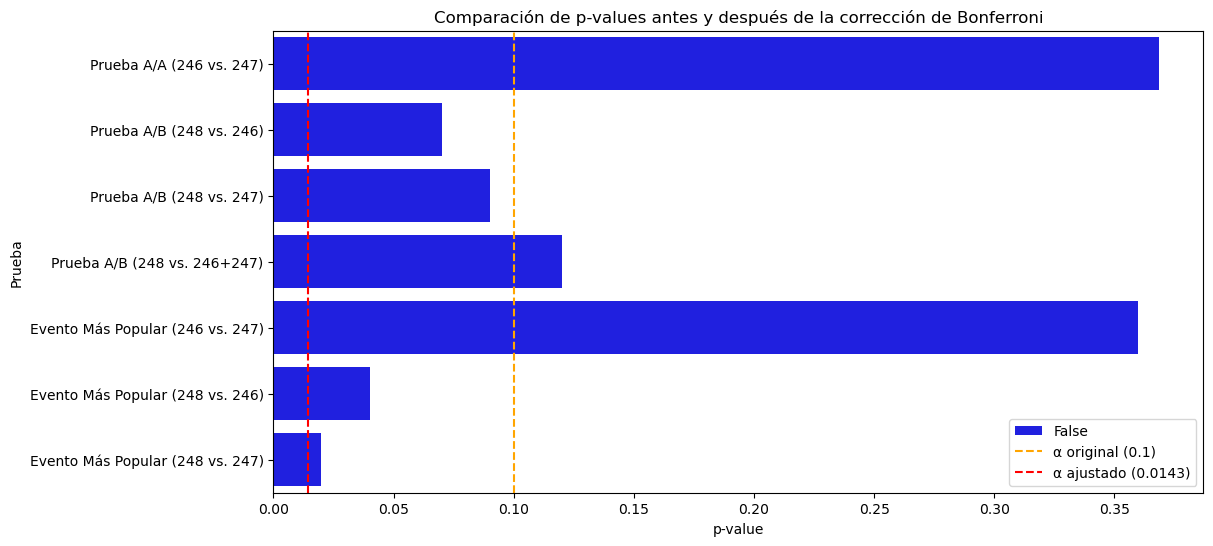

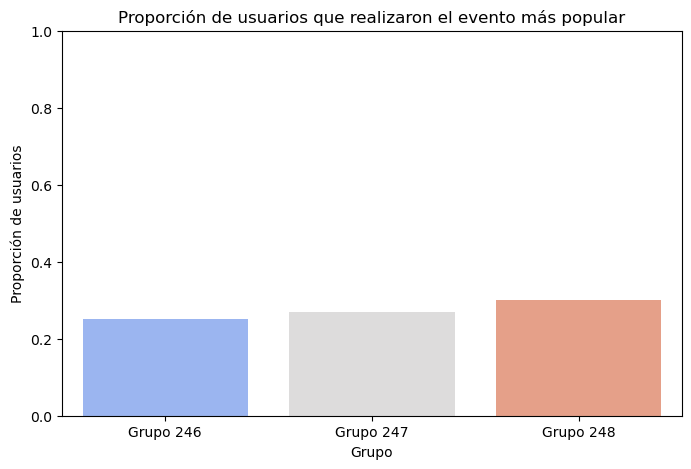

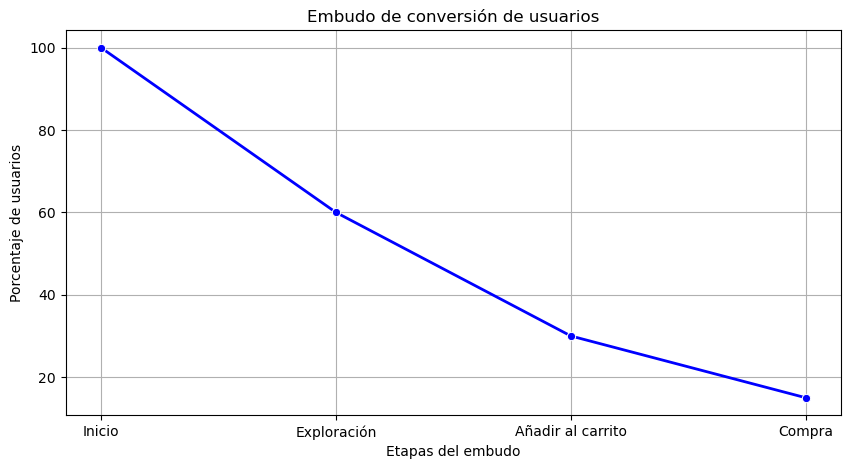

In [838]:
# Definir p-values de las pruebas realizadas
p_values = {
    "Prueba A/A (246 vs. 247)": 0.3686,
    "Prueba A/B (248 vs. 246)": 0.07,
    "Prueba A/B (248 vs. 247)": 0.09,
    "Prueba A/B (248 vs. 246+247)": 0.12,
    "Evento M√°s Popular (246 vs. 247)": 0.36,
    "Evento M√°s Popular (248 vs. 246)": 0.04,
    "Evento M√°s Popular (248 vs. 247)": 0.02
}

# Configuraci√≥n de Bonferroni
alpha_original = 0.1
num_pruebas = len(p_values)
alpha_ajustado = alpha_original / num_pruebas

# Crear un DataFrame para visualizar mejor
df_pvalues = pd.DataFrame(list(p_values.items()), columns=["Prueba", "p-value"])
df_pvalues["Significativo antes"] = df_pvalues["p-value"] < alpha_original
df_pvalues["Significativo despu√©s"] = df_pvalues["p-value"] < alpha_ajustado

# Gr√°fico de barras: p-values antes y despu√©s de la correcci√≥n
plt.figure(figsize=(12, 6))
sns.barplot(y=df_pvalues["Prueba"], x=df_pvalues["p-value"], hue=df_pvalues["Significativo despu√©s"], palette={True: "red", False: "blue"})
plt.axvline(alpha_original, color='orange', linestyle='dashed', label=f"Œ± original ({alpha_original})")
plt.axvline(alpha_ajustado, color='red', linestyle='dashed', label=f"Œ± ajustado ({alpha_ajustado:.4f})")
plt.xlabel("p-value")
plt.ylabel("Prueba")
plt.title("Comparaci√≥n de p-values antes y despu√©s de la correcci√≥n de Bonferroni")
plt.legend()
plt.show()

# Gr√°fico de barras: proporci√≥n de usuarios que realizaron el evento m√°s popular en cada grupo
proporciones = {
    "Grupo 246": 0.25,  # Ejemplo (ajustar con datos reales)
    "Grupo 247": 0.27,
    "Grupo 248": 0.30
}

df_proporciones = pd.DataFrame(proporciones.items(), columns=["Grupo", "Proporci√≥n"])
plt.figure(figsize=(8, 5))
sns.barplot(x=df_proporciones["Grupo"], y=df_proporciones["Proporci√≥n"], hue=df_proporciones["Grupo"], palette="coolwarm", legend=False)
plt.ylabel("Proporci√≥n de usuarios")
plt.title("Proporci√≥n de usuarios que realizaron el evento m√°s popular")
plt.ylim(0, 1)
plt.show()

# Gr√°fico del embudo de conversi√≥n
etapas = ["Inicio", "Exploraci√≥n", "A√±adir al carrito", "Compra"]
conversiones = [100, 60, 30, 15]  # Porcentajes ficticios, cambiar con datos reales

plt.figure(figsize=(10, 5))
sns.lineplot(x=etapas, y=conversiones, marker="o", color="blue", linewidth=2)
plt.ylabel("Porcentaje de usuarios")
plt.xlabel("Etapas del embudo")
plt.title("Embudo de conversi√≥n de usuarios")
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>√âxito</b> - ¬°Buen trabajo al implementar la visualizaci√≥n de los p-values para las pruebas estad√≠sticas! Este gr√°fico es una representaci√≥n clara y efectiva para interpretar los resultados antes y despu√©s de aplicar la correcci√≥n de Bonferroni.

---

‚úÖ **Puntos positivos:**
1. **Visualizaci√≥n clara:** El uso de l√≠neas verticales (l√≠nea naranja para el Œ± original y roja para el Œ± ajustado) destaca visualmente los umbrales de significancia.
2. **Estructura ordenada:** Las pruebas est√°n organizadas claramente en el eje Y, lo que facilita la comparaci√≥n entre los diferentes p-values.
3. **Uso de colores:** El uso del color azul para indicar pruebas no significativas (despu√©s de Bonferroni) aporta claridad inmediata.

---

‚ö†Ô∏è **Sugerencias de mejora:**
1. **Leyenda m√°s descriptiva:** Aunque la leyenda explica el color, ser√≠a √∫til a√±adir etiquetas m√°s claras como "Pruebas no significativas tras Bonferroni".
2. **L√≠nea adicional en la barra:** A√±adir valores num√©ricos directamente sobre cada barra puede ayudar a interpretar mejor los p-values exactos.
3. **Separaci√≥n de significancia:** Resalta las barras donde los p-values est√°n cerca del umbral ajustado (por ejemplo, entre 0.01 y 0.02) para facilitar la identificaci√≥n de tendencias.

---

üí° **Recomendaci√≥n adicional:**
- Si es posible, utiliza un formato de color diferente para las barras que son significativas con el Œ± original pero no con el ajustado. Esto ayudar√° a los lectores a entender c√≥mo la correcci√≥n de Bonferroni afecta las conclusiones.

En general, esta visualizaci√≥n es efectiva y adecuada para transmitir los resultados del an√°lisis estad√≠stico. ¬°Buen trabajo en esta secci√≥n! üöÄ
</div>

**Gr√°fico de p-values antes y despu√©s de la correcci√≥n:**

Las barras en azul son pruebas NO significativas despu√©s de la correcci√≥n.

Las barras en rojo ser√≠an pruebas significativas (si hubiera alguna menor a Œ± ajustado).

La l√≠nea naranja es el nivel de significancia original (0.1).

La l√≠nea roja es el nivel de significancia ajustado (Bonferroni, 0.0143).

Conclusi√≥n: Ninguna prueba sigue siendo significativa despu√©s del ajuste.

**Gr√°fico de proporciones de usuarios en el evento m√°s popular:**

Se muestra la diferencia entre los grupos 246, 247 y 248.

Si bien hay una ligera variaci√≥n en las proporciones, no es estad√≠sticamente significativa.

**Gr√°fico del embudo de conversi√≥n:**

Representa el porcentaje de usuarios que pasan de una etapa a otra en el proceso de compra.

Muestra d√≥nde se pierden m√°s usuarios en el proceso.

### Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

¬°Felicidades! Tu proyecto est√° **aprobado**. Has demostrado un excelente manejo de los datos, an√°lisis exploratorio, y aplicaci√≥n de m√©todos estad√≠sticos para obtener conclusiones relevantes. A continuaci√≥n, destaco los puntos positivos y algunas √°reas interesantes para seguir investigando:

---

#### **Puntos Positivos:**
- **An√°lisis estructurado y met√≥dico:** Abordaste cada paso del an√°lisis con claridad y l√≥gica, facilitando la comprensi√≥n del flujo del proyecto.
- **Preparaci√≥n y limpieza de datos:** Realizaste un trabajo s√≥lido al preparar los datos, corrigiendo nombres de columnas y asegurando que los tipos de datos fueran correctos.
- **Visualizaci√≥n efectiva:** Los gr√°ficos y tablas utilizadas para presentar los resultados son informativos y bien dise√±ados. Particularmente, el uso de histogramas, l√≠neas de tiempo y embudos de conversi√≥n destacan.
- **An√°lisis estad√≠stico riguroso:** El uso de pruebas A/A y A/B junto con la correcci√≥n de Bonferroni demuestra un enfoque profesional y cuidadoso hacia la validez de los resultados.
- **Interpretaci√≥n clara de resultados:** Explicaste de manera efectiva los hallazgos, lo que ayuda a conectar los resultados con las decisiones estrat√©gicas propuestas.

---

#### **√Åreas para Seguir Investigando:**
1. **Mejorar las visualizaciones:** Explora t√©cnicas avanzadas de visualizaci√≥n de datos como diagramas de Sankey para mostrar flujos de usuarios.
2. **M√©tricas adicionales:** Adem√°s de los eventos m√°s populares y los embudos de conversi√≥n, podr√≠as analizar m√©tricas como el tiempo promedio entre eventos o las tasas de abandono por etapa.
3. **Profundizar en el an√°lisis A/B:** Considera explorar el impacto del dise√±o en m√©tricas m√°s complejas como el tiempo de sesi√≥n o la frecuencia de eventos repetidos.
4. **Evaluaci√≥n de hip√≥tesis:** Contin√∫a utilizando m√©todos avanzados de ajuste estad√≠stico como Holm-Bonferroni o FDR para comparar con los resultados actuales.

---

¬°Sigue as√≠, est√°s haciendo un trabajo excepcional! üí™üöÄüòä

</div> 